In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/corona.csv", encoding='cp949')

In [12]:
# 데이터 형태보기
data.shape

(4935, 8)

In [13]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              4935 non-null   int64  
 1   ObservationDate  4935 non-null   object 
 2   Province/State   3120 non-null   object 
 3   Country/Region   4935 non-null   object 
 4   Last Update      4935 non-null   object 
 5   Confirmed        4935 non-null   float64
 6   Deaths           4935 non-null   float64
 7   Recovered        4935 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 308.6+ KB


In [16]:
# null값이 얼마나 있는지 보기
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     1815
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [17]:
# 해당 Kaggle 데이터에서 Last Update에 대한 칼럼삭제 권고
data = data.drop(['Last Update'], axis=1)
data.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0


In [20]:
# 코로나 발견(진단) 날짜 Datetime형식으로 변환
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0


In [21]:
# 데이터에 대한 최대,최솟값 사분위값들이지만 해당 데이터 유형에는 맞지 않아서 별로 의미가 없음
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,4935.000000,4935.000000,4935.000000,4935.00000
mean,2468.000000,577.614590,17.694833,201.01155
std,1424.756119,4971.492694,192.348513,2179.79852
min,1.000000,0.000000,0.000000,0.00000
25%,1234.500000,1.000000,0.000000,0.00000
50%,2468.000000,9.000000,0.000000,1.00000
75%,3701.500000,93.000000,1.000000,14.00000
max,4935.000000,67773.000000,3046.000000,49134.00000


## <각 Column에 대한 정의> *데이터 갱신날짜는 2020-03-11일까지 입니다.*
### - Sno - Serial number
### - ObservationDate - Date of the observation in MM/DD/YYYY(진단 날짜)
### - Province/State - Province or state of the observation (Could be empty when missing)
### - Country/Region - Country of observation
### - Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
### - Confirmed - Cumulative number of confirmed cases till that date(현재까지 확진 자 누적 숫자)
### - Deaths - Cumulative number of of deaths till that date(현재까지 사망자 누적 숫자)
### - Recovered - Cumulative number of recovered cases till that date(현재까지 완치자 누적 숫자

In [23]:
data.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0


In [35]:
# Country/Region별로 시간이 지남에 따라 환진자 누적 숫자를 비교해서 확진자 수가 가장 많은 순서대로 나열해보자.
# 누적숫자(Confirmed) 칼럼 중 나라별로 가장 큰 값을 구하면 최근까지 총 확진자 수가 나올 것이다
pd.options.display.max_rows=150
confirm = data.groupby(['Country/Region'])['Confirmed'].max().sort_values(ascending=False)
confirm

Country/Region
China                             67773.0
Mainland China                    67760.0
Italy                             12462.0
Iran                               9000.0
South Korea                        7755.0
France                             2281.0
Spain                              2277.0
Germany                            1908.0
Others                              706.0
Cruise Ship                         696.0
Switzerland                         652.0
Japan                               639.0
Norway                              598.0
Netherlands                         503.0
Sweden                              500.0
United Kingdom                      456.0
Denmark                             442.0
UK                                  382.0
US                                  366.0
Belgium                             314.0
Qatar                               262.0
Austria                             246.0
Bahrain                             195.0
Singapore          

In [37]:
death = data.groupby(['Country/Region'])['Deaths'].max().sort_values(ascending=False)
death

Country/Region
China                             3046.0
Mainland China                    3024.0
Italy                              827.0
Iran                               354.0
South Korea                         60.0
Spain                               54.0
France                              48.0
US                                  29.0
Japan                               17.0
United Kingdom                       8.0
Cruise Ship                          7.0
Iraq                                 7.0
Others                               6.0
UK                                   6.0
Netherlands                          5.0
Switzerland                          4.0
Lebanon                              3.0
Australia                            3.0
Hong Kong                            3.0
Germany                              3.0
Belgium                              3.0
San Marino                           2.0
Argentina                            1.0
Panama                               1.0
T

In [38]:
recovered = data.groupby(['Country/Region'])['Recovered'].max().sort_values(ascending=False)
recovered

Country/Region
China                             49134.0
Mainland China                    47743.0
Iran                               2959.0
Italy                              1045.0
Cruise Ship                         325.0
South Korea                         288.0
Spain                               183.0
Japan                               118.0
Singapore                            96.0
Hong Kong                            65.0
Others                               40.0
Bahrain                              35.0
Thailand                             34.0
Egypt                                27.0
Malaysia                             26.0
Germany                              25.0
United Kingdom                       18.0
UK                                   18.0
United Arab Emirates                 17.0
Taiwan*                              17.0
Taiwan                               17.0
Viet Nam                             16.0
Vietnam                              16.0
Iraq               

In [39]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [41]:
pd.options.display.max_rows=5000
data['ObservationDate']

0      2020-01-22
1      2020-01-22
2      2020-01-22
3      2020-01-22
4      2020-01-22
5      2020-01-22
6      2020-01-22
7      2020-01-22
8      2020-01-22
9      2020-01-22
10     2020-01-22
11     2020-01-22
12     2020-01-22
13     2020-01-22
14     2020-01-22
15     2020-01-22
16     2020-01-22
17     2020-01-22
18     2020-01-22
19     2020-01-22
20     2020-01-22
21     2020-01-22
22     2020-01-22
23     2020-01-22
24     2020-01-22
25     2020-01-22
26     2020-01-22
27     2020-01-22
28     2020-01-22
29     2020-01-22
30     2020-01-22
31     2020-01-22
32     2020-01-22
33     2020-01-22
34     2020-01-22
35     2020-01-22
36     2020-01-22
37     2020-01-22
38     2020-01-23
39     2020-01-23
40     2020-01-23
41     2020-01-23
42     2020-01-23
43     2020-01-23
44     2020-01-23
45     2020-01-23
46     2020-01-23
47     2020-01-23
48     2020-01-23
49     2020-01-23
50     2020-01-23
51     2020-01-23
52     2020-01-23
53     2020-01-23
54     2020-01-23
55     202

In [50]:
# 총 기간 중 월(month)별로 얼마나 확진자가 누적해서 발생했는지 보기위해서 'month'칼럼 따로 만들기
data['Month'] = pd.DatetimeIndex(data['ObservationDate']).month
data.head(2)

,SNo,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered,Month
0,1,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0,1
1,2,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0,1


In [62]:
# 한국의 데이터로 좁혀보자
korea_data = data.loc[data['Country/Region'] == 'South Korea',['Country/Region','ObservationDate','Confirmed', 'Deaths', 'Recovered']]
korea_data

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
37,South Korea,2020-01-22,1.0,0.0,0.0
75,South Korea,2020-01-23,1.0,0.0,0.0
121,South Korea,2020-01-24,2.0,0.0,0.0
162,South Korea,2020-01-25,2.0,0.0,0.0
208,South Korea,2020-01-26,3.0,0.0,0.0
255,South Korea,2020-01-27,4.0,0.0,0.0
306,South Korea,2020-01-28,4.0,0.0,0.0
358,South Korea,2020-01-29,4.0,0.0,0.0
413,South Korea,2020-01-30,4.0,0.0,0.0
468,South Korea,2020-01-31,11.0,0.0,0.0


In [63]:
korea_data.head(2)

,Country/Region,ObservationDate,Confirmed,Deaths,Recovered
37,South Korea,2020-01-22,1.0,0.0,0.0
75,South Korea,2020-01-23,1.0,0.0,0.0


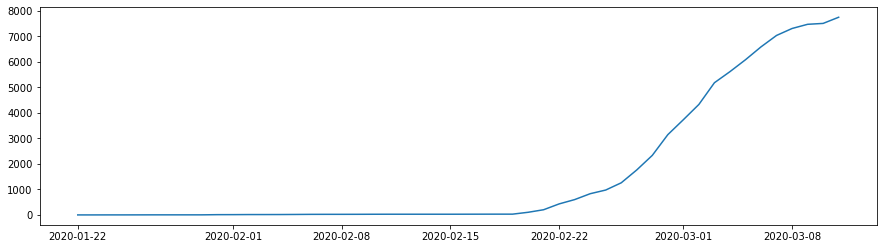

In [65]:
# 진단날짜별로 확진 누적자 숫자를 그래프로 그려보자
plt.figure(figsize=(15,4))
plt.plot(korea_data['ObservationDate'],korea_data['Confirmed'])
plt.show()

# 22일을 기점으로 해서 확진자 숫자 증가율이 급격히 상승한다.

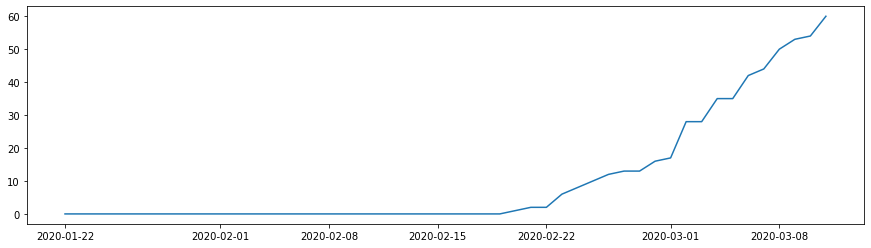

In [68]:
# 진단날짜별로 사망자 누적 숫자를 그래프로 그려보자
plt.figure(figsize=(15,4))
plt.plot(korea_data['ObservationDate'],korea_data['Deaths'])
plt.show()

# 사망자수는 3월 1일 이후로 갑자기 급격히 상승한다.
# 아마 확진자 수가 급격히 증가했을 때 이후로 약 8일이 지났을 때이다.

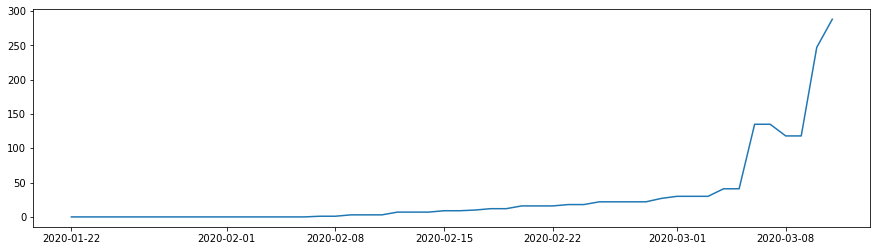

In [67]:
# 진단날짜별로 완치자 누적 숫자를 그래프로 그려보자
plt.figure(figsize=(15,4))
plt.plot(korea_data['ObservationDate'],korea_data['Recovered'])
plt.show()

# 완치자 수는 3월 3일~4일 급격히 상승했다가 다시 감소하다가 3.9일 이후로 완치자가 급격히 상승한다.
# 이는 확진자 숫자가 급격히 증가했던 2.22일을 기준으로 해서 14~16일 정도 지난 시점이다. 
# 따라서 코로나 확진으로부터 완치하기까지는 대략 14~16일 정도의 치유기간을 가지는 듯 하다.